# Deep Learning and Neural Network - Question 1
## Arian Firoozi - 810100196
## Arman Majidi - 810100205

![University of Tehran logo](UTLogo\University_of_Tehran_logo.svg "University of Tehran")
![Engineering faculty of University of Tehran logo](UTLogo\Engineering_faculty_University_of_Tehran_logo.png "Engineering faculty")

# Outline
- [ 0 - Packages ](#0)
- [ 1 - MLP Design ](#1)
- [ 2 - Two Different Model Training ](#2)
- [ 3 - Backpropagation Algorithm ](#3)
- [ 4 - Different Hyperparameters Checking ](#4)

---

<a name="0"></a>
## 0 - Packages 

First, let's run the cell below to import all the packages.
- [numpy](https://numpy.org) is the fundamental package for working with matrices in Python.
- [scipy](https://scipy.org) is an open-source software for mathematics, science, and engineering.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import keras_tuner as kt

---

<a name="1"></a>
## 1 - MLP Design

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
data_min = np.min(X_train, axis=0)
data_max = np.max(X_train, axis=0)
X_train = ((X_train - data_min) / (data_max - data_min)).astype(np.float64)
X_test = ((X_test - data_min) / (data_max - data_min)).astype(np.float64)

In [3]:
input_shape = X_train.shape[1:]
learning_rate = 0.001
model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(10, activation='softmax')   
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
hist = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7448 - loss: 0.7582
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8408 - loss: 0.4706
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8519 - loss: 0.4430
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8574 - loss: 0.4308
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8631 - loss: 0.4125
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8670 - loss: 0.4083
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3973
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3944
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.3918
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8731 - loss: 0.3954
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3922
Epoch 12/50
1875/1875 ━━━━━━━━

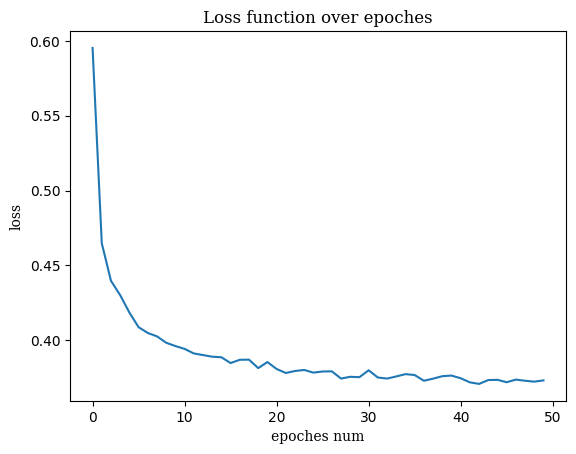

In [5]:
plt.plot(hist.history['loss'])
plt.title('Loss function over epoches', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

#### ◆ Confusion matrix

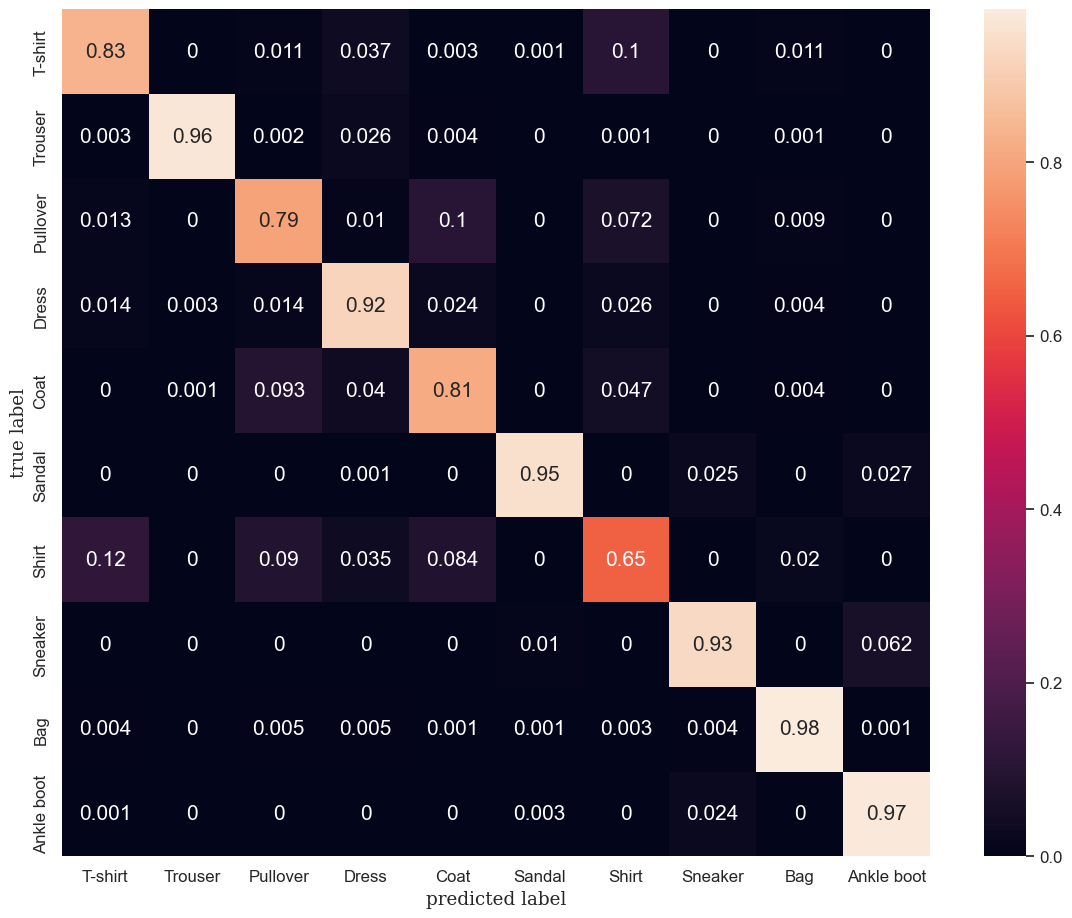

In [6]:
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
conf_mat = conf_mat.T / np.sum(conf_mat, axis=1)

plt.figure(figsize=(14, 11))
sns.set(font_scale=1.1) # for label size
labels = ["T-shirt", "Trouser", "Pullover", "Dress",
          "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
sns.heatmap(conf_mat.T, xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 15})
plt.xlabel('predicted label', fontdict={'family':'serif'})
plt.ylabel('true label', fontdict={'family':'serif'})
plt.show()

#### ◆ Classes and most mistaken label

In [7]:
worst_class = np.argmax(conf_mat - np.diag(np.diag(conf_mat)), axis=0)
mapping = {0:"T-shirt", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",
           5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}
worst_labels = list(np.vectorize(mapping.get)(worst_class))
worst_labels

['Shirt',
 'Dress',
 'Coat',
 'Shirt',
 'Pullover',
 'Ankle boot',
 'T-shirt',
 'Ankle boot',
 'Pullover',
 'Sneaker']

#### ◆ Two most confused classes

In [8]:
two_worst_class = np.argmax(conf_mat + conf_mat.T - 2*np.diag(np.diag(conf_mat)))
two_worst_class = np.unravel_index(two_worst_class, conf_mat.shape)
two_worst_labels = list(np.vectorize(mapping.get)(two_worst_class))
two_worst_labels

['T-shirt', 'Shirt']

#### ◆ Increasing model complexity

Increasing the number of hidden layers or neurons allows the model to learn more complex representations and patterns from the data. However, it may also increase the risk of overfitting, especially if the model is too complex relative to the dataset size. The goal is to find a balance between model complexity and generalization.

#### ◆ Choosing best hyperparameters

One common method for selecting hyperparameters is Grid Search or Random Search. These approaches systematically evaluate different combinations of hyperparameters (like learning rate, regularization strength, number of neurons, etc.) and select the combination that provides the best validation accuracy. Additionally, more advanced techniques like Bayesian Optimization can also be used for more efficient hyperparameter tuning.

---

<a name="2"></a>
## 2 - Two Different Model Training

In [9]:
model1 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   
])
model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(48, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(10, activation='softmax')   
])
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [11]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.942883312702179
	accuracy on test data:  0.8761000037193298


Model 2 accuracy on train data: 0.8690500259399414
	accuracy on test data:  0.8580999970436096


#### ◆ Histogram

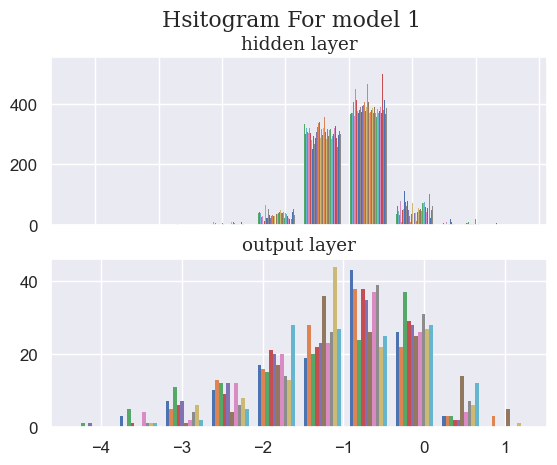

In [12]:
weights_hidden, bias_hidden, weights_last, bias_last = model1.weights
fig, axs = plt.subplots(2)
fig.suptitle('Hsitogram For model 1', fontdict={'family':'serif'})
axs[0].hist(np.array(weights_hidden.value), lw=0)
axs[0].set_title('hidden layer', fontdict={'family':'serif'})
axs[1].hist(np.array(weights_last.value), lw=0)
axs[1].set_title('output layer', fontdict={'family':'serif'})
for ax in axs.flat:
    ax.label_outer()
plt.show()

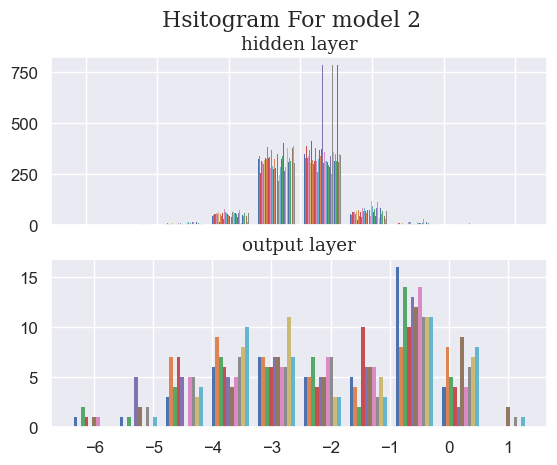

In [13]:
weights_hidden, bias_hidden, weights_last, bias_last = model2.weights
fig, axs = plt.subplots(2)
fig.suptitle('Hsitogram For model 2', fontdict={'family':'serif'})
axs[0].hist(np.array(weights_hidden.value), lw=0)
axs[0].set_title('hidden layer', fontdict={'family':'serif'})
axs[1].hist(np.array(weights_last.value), lw=0)
axs[1].set_title('output layer', fontdict={'family':'serif'})
for ax in axs.flat:
    ax.label_outer()
plt.show()

**<span style="color:red"> Difference Should be written </span>**

#### ◆ Model improvement

##### Adam optimizer

In [14]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [16]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9675999879837036
	accuracy on test data:  0.8852999806404114


Model 2 accuracy on train data: 0.881600022315979
	accuracy on test data:  0.8680999875068665


##### RMSprop optimizer

In [17]:
model1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
hist1 = model1.fit(X_train, y_train, epochs=40, verbose=0)
hist2 = model2.fit(X_train, y_train, epochs=40, verbose=0)

In [19]:
model1_train = hist1.history['accuracy'][-1]
model1_test = model1.evaluate(X_test, y_test, verbose=0)
model2_train = hist2.history['accuracy'][-1]
model2_test = model2.evaluate(X_test, y_test, verbose=0)
print(f'Model 1 accuracy on train data: {model1_train}\n\taccuracy on test data:  {model1_test[1]}\n\n')
print(f'Model 2 accuracy on train data: {model2_train}\n\taccuracy on test data:  {model2_test[1]}')

Model 1 accuracy on train data: 0.9817000031471252
	accuracy on test data:  0.8820000290870667


Model 2 accuracy on train data: 0.8705333471298218
	accuracy on test data:  0.8618000149726868


**<span style="color:red"> Details Should be written </span>**

---

<a name="3"></a>
## 3 - Backpropagation Algorithm

In [20]:
model3 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')   
])
initial_weights = model3.get_weights()

##### Without optimizer

In [21]:
model3.set_weights(initial_weights)
model3.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=30, verbose=0)

In [22]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.9042666554450989
      accuracy on test data:  0.8716999888420105


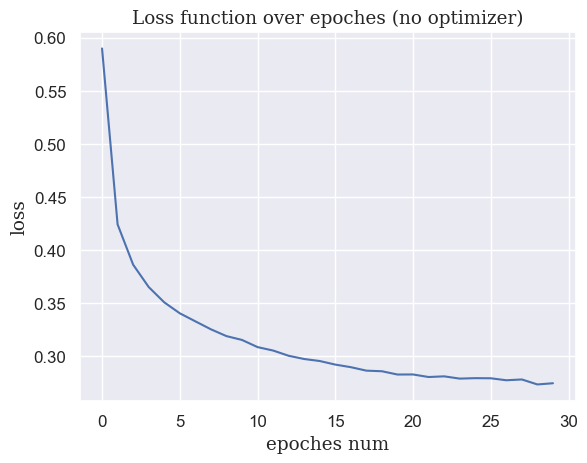

In [23]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (no optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

##### Adam optimizer

In [24]:
model3.set_weights(initial_weights)
model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=20, verbose=0)

In [25]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.9057499766349792
      accuracy on test data:  0.8698999881744385


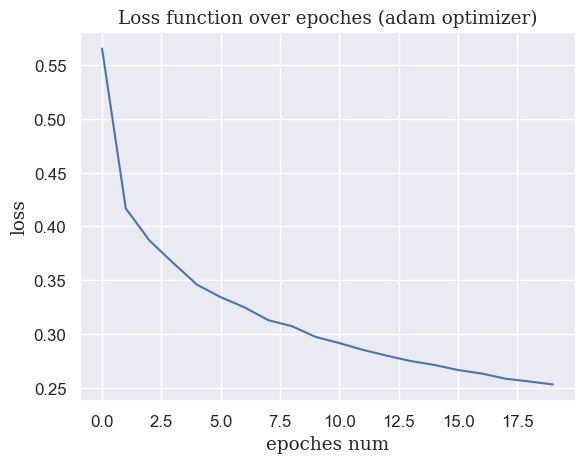

In [26]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (adam optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

##### NAdam optimizer

In [27]:
model3.set_weights(initial_weights)
model3.compile(optimizer=keras.optimizers.Nadam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=20, verbose=0)

In [28]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.9075666666030884
      accuracy on test data:  0.8756999969482422


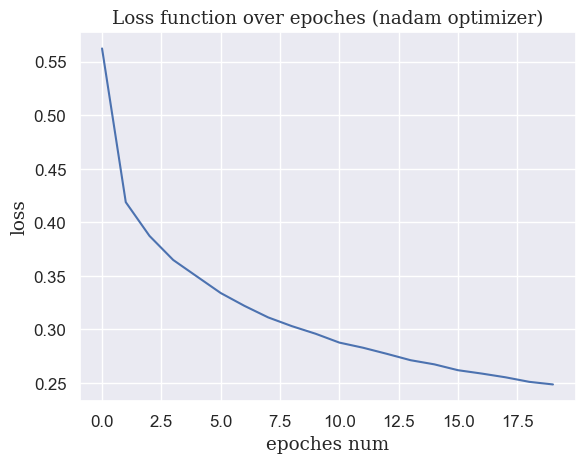

In [29]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (nadam optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

##### RMSprop optimizer

In [30]:
model3.set_weights(initial_weights)
model3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=20, verbose=0)

In [31]:
model3_train = hist3.history['accuracy'][-1]
model3_test = model3.evaluate(X_test, y_test, verbose=0)
print(f'Model accuracy on train data: {model3_train}\n{6*' '}accuracy on test data:  {model3_test[1]}')

Model accuracy on train data: 0.8989499807357788
      accuracy on test data:  0.870199978351593


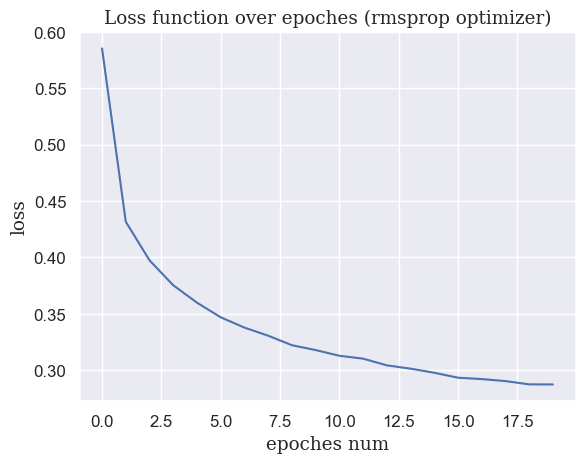

In [32]:
plt.plot(hist3.history['loss'])
plt.title('Loss function over epoches (rmsprop optimizer)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.show()

#### ◆ Optimizers comparison

**<span style="color:red"> To Be Completed </span>**

#### ◆ Model Tuning

In [33]:
def create_model3(hp):
    model3 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(hp.Choice('hiddenLayerUnits', values=[16, 32, 64]), activation='relu'),
        Dense(hp.Choice('hiddenLayerUnits', values=[8, 16, 32]), activation='relu'),
        Dense(10, activation='softmax')
    ])
    learning_rate = hp.Choice('learningRate', values=[1e-3, 5e-4, 1e-4])
    model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model3

##### Bayesian optimization

In [34]:
def create_model3(hp):
    hp_units = hp.Int('units', min_value=8, max_value=128, step=32)
    model3 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(hp_units, activation='relu'),
        Dense(hp_units, activation='relu'),
        Dense(10, activation='softmax')
    ])
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling="log")
    model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model3

In [35]:
tunerBayesianOptimizer = kt.BayesianOptimization(
    create_model3,
    objective='accuracy',
    max_trials=10,
    directory='model3',
    project_name='bayesian_optimization'
)

Reloading Tuner from model3\bayesian_optimization\tuner0.json


In [36]:
tunerBayesianOptimizer.search(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 24s]
accuracy: 0.911549985408783

Best accuracy So Far: 0.911549985408783
Total elapsed time: 01h 16m 12s


---

<a name="4"></a>
## 4 - Different Hyperparameters Checking

In [37]:
model4 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(10, activation='softmax')
    ])
initial_weights = model4.get_weights()

##### Optimizer: Adam + Leaning rate: 0.01

In [38]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

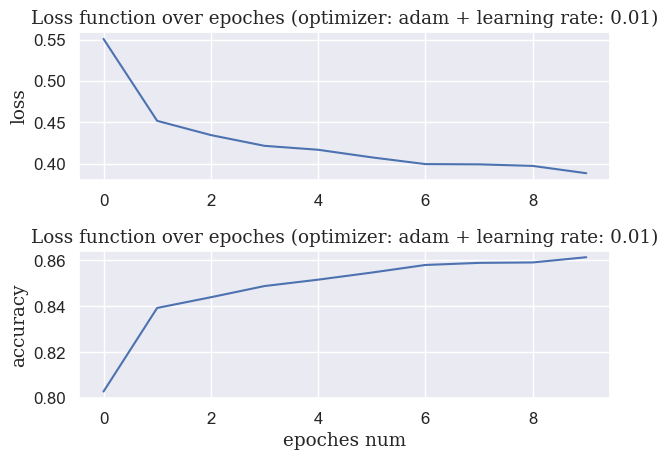

In [39]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.01

In [40]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

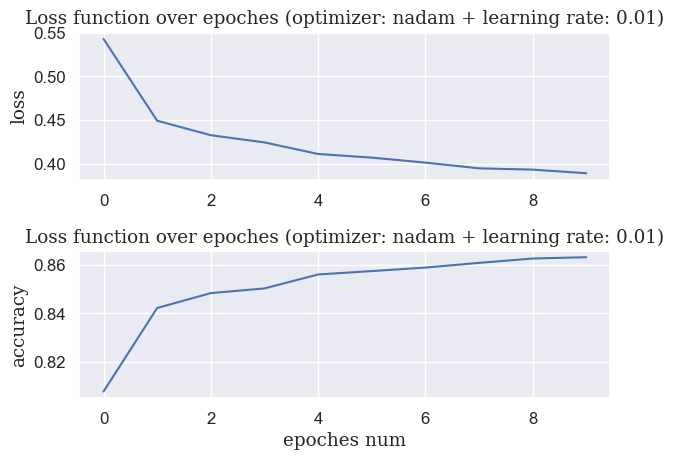

In [41]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.01)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: RMSprop + Leaning rate: 0.01

In [42]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

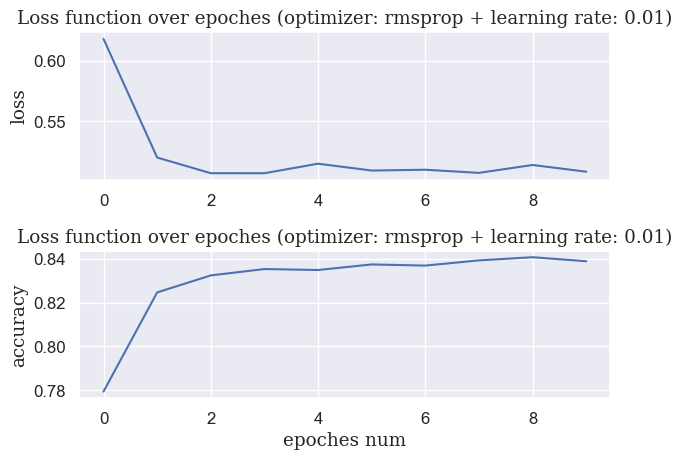

In [43]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.01)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.01)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Adam + Leaning rate: 0.005

In [44]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

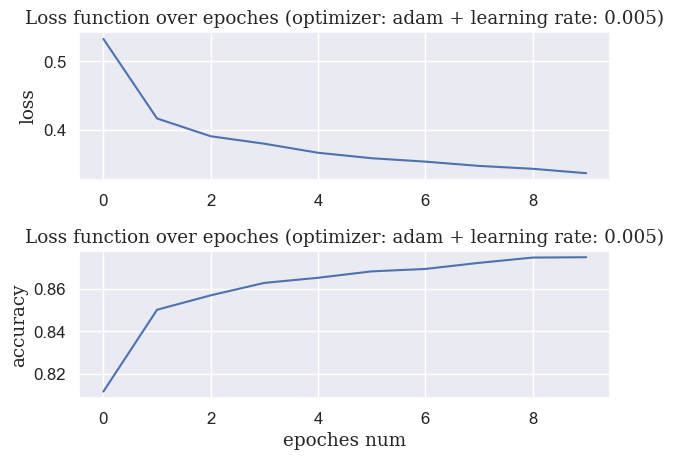

In [45]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.005

In [46]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

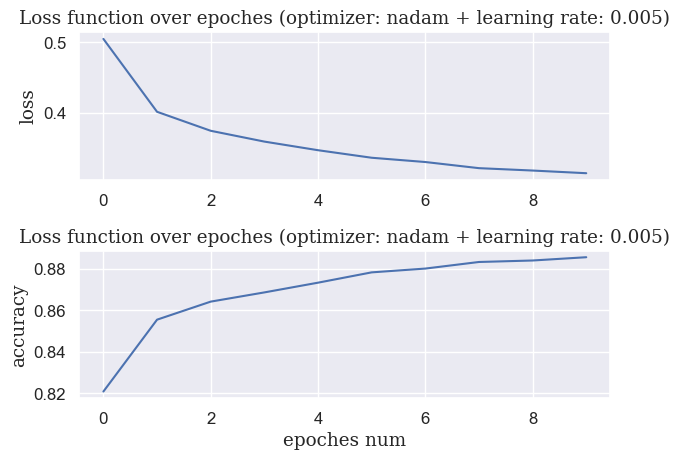

In [47]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.005)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: RMSprop + Leaning rate: 0.005

In [48]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.005),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

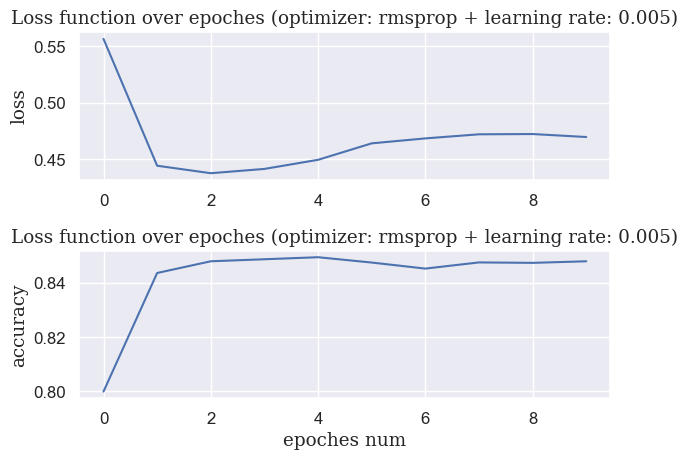

In [49]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.005)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.005)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Adam + Leaning rate: 0.001

In [50]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

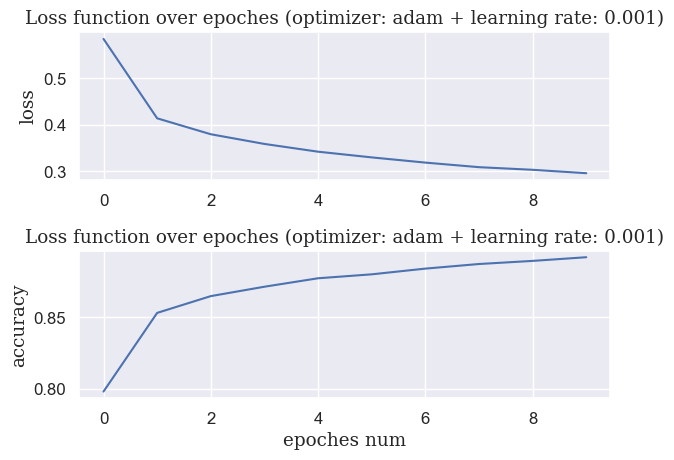

In [51]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: adam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: Nadam + Leaning rate: 0.001

In [52]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

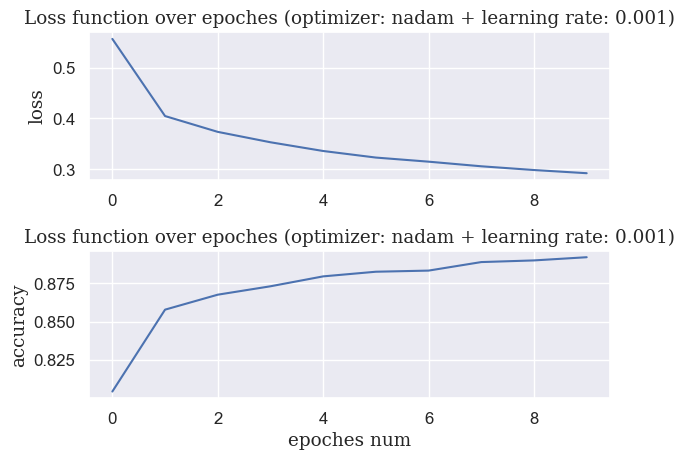

In [53]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: nadam + learning rate: 0.001)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

##### Optimizer: RMSprop + Leaning rate: 0.001

In [54]:
model4.set_weights(initial_weights)
model4.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist4 = model4.fit(X_train, y_train, epochs=10, verbose=0)

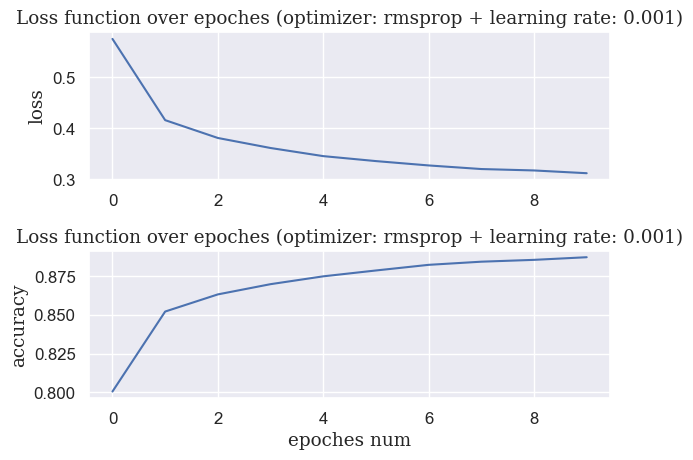

In [55]:
plt.subplot(2, 1, 1)
plt.plot(hist4.history['loss'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.001)', fontdict={'family':'serif'})
plt.ylabel('loss', fontdict={'family':'serif'})
plt.subplot(2, 1, 2)
plt.plot(hist4.history['accuracy'])
plt.title('Loss function over epoches (optimizer: rmsprop + learning rate: 0.001)', fontdict={'family':'serif'})
plt.xlabel('epoches num', fontdict={'family':'serif'})
plt.ylabel('accuracy', fontdict={'family':'serif'})
plt.tight_layout()
plt.show()

#### ◆ Hyperparameters Tuning

In [56]:
def create_model4(hp):
    model4 = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(hp.Choice('hiddenLayerUnits', values=[32, 64, 128]), activation='relu'),
        Dense(hp.Choice('LayerUnits', values=[16, 32, 64]), activation='relu'),
        Dense(10, activation='softmax')
    ])
    learning_rate = hp.Choice('learningRate', values=[1e-3, 5e-4, 1e-4])
    model4.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model4

##### Random search

In [72]:
tunerRandomSearch = kt.RandomSearch(
    create_model4,
    objective='accuracy',
    max_trials=9,
    executions_per_trial=1,
    directory='model4',
    project_name='random_search'
)

In [73]:
tunerRandomSearch.search(X_train, y_train, epochs=10)

Trial 9 Complete [00h 00m 17s]
accuracy: 0.8831166625022888

Best accuracy So Far: 0.909600019454956
Total elapsed time: 00h 03m 16s


##### Grid search

In [59]:
tunerGridSearch = kt.GridSearch(
    create_model4,
    objective='accuracy',
    max_trials=9,
    executions_per_trial=1,
    directory='model4',
    project_name='grid_search'
)

In [60]:
tunerGridSearch.search(X_train, y_train, epochs=10)

Trial 9 Complete [00h 00m 17s]
accuracy: 0.8706499934196472

Best accuracy So Far: 0.8984833359718323
Total elapsed time: 00h 02m 49s


**<span style="color:red"> To Be Completed </span>**

#### ◆ Confusion Matrix Comparison

##### Best model via Tuning

In [74]:
best_model = tunerRandomSearch.get_best_models(num_models=1)[0]
history = best_model.fit(X_train, y_train, epochs=50)

Epoch 1/50


C:\Users\arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9142 - loss: 0.2265
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9199 - loss: 0.2134
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9202 - loss: 0.2108
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9204 - loss: 0.2083
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9237 - loss: 0.2018
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.1952
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9296 - loss: 0.1880
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9292 - loss: 0.1807
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9310 - loss: 0.1771
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9329 - loss: 0.1777
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9360 - loss: 0.1669
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━

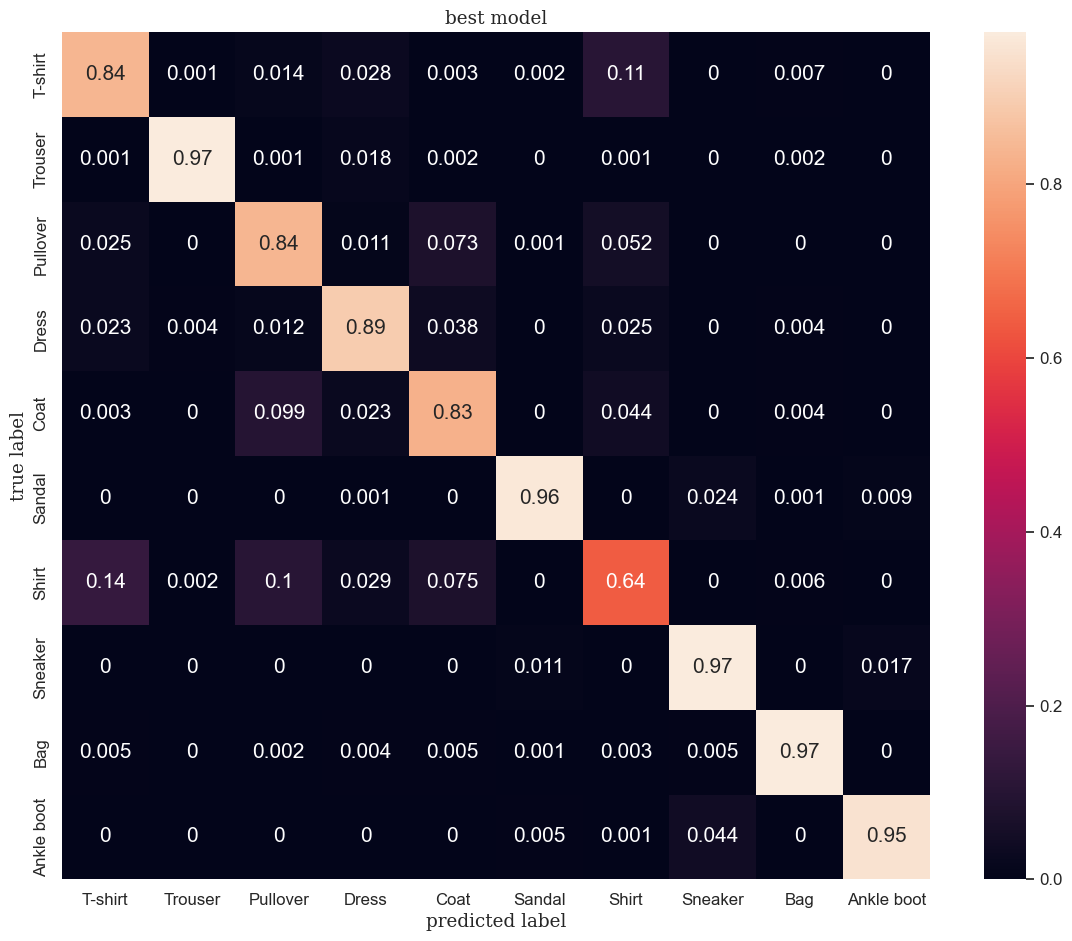

In [75]:
y_pred = best_model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
conf_mat = conf_mat.T / np.sum(conf_mat, axis=1)

plt.figure(figsize=(14, 11))
sns.set(font_scale=1.1)
sns.heatmap(conf_mat.T, xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 15})
plt.title('best model', fontdict={'family':'serif'})
plt.xlabel('predicted label', fontdict={'family':'serif'})
plt.ylabel('true label', fontdict={'family':'serif'})
plt.show()

**<span style="color:red"> To Be Completed </span>**

---